# Latihan Praktek BOW

### Eksplorasi Awal Representasi Teks Kebahagiaan Global dengan BoW dan TF-IDF

#### NIM: A11.2023.15194
#### NAMA: RESTU ARDIANSYAH
#### KELOMPOK: A11.4406
#### MATA KULIAH: PEMBELAJARAN MESIN

In [123]:
import pandas as pd
import numpy as np

In [124]:
dataset = pd.read_csv('world-happiness-report-2021.csv',sep=';')

In [125]:
dataset.shape

(149, 20)

In [126]:
dataset.head(20)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.400,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


##### mengambil label yang mendukung faktor 

In [127]:
dataset_analist = dataset[
    ['Explained by: Log GDP per capita',
     'Explained by: Social support',
     'Explained by: Healthy life expectancy',
     'Explained by: Freedom to make life choices',
     'Explained by: Generosity',
     'Explained by: Perceptions of corruption',
     'Dystopia + residual']
]

In [128]:
dataset_label = dataset['Ladder score']

In [129]:
dataset_analist

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...
144,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [130]:
dataset_label

0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Ladder score, Length: 149, dtype: float64

# Cek Distribusi Label

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Visualizing the target variable

C:\Users\RESTU ARDIANSYAH\AppData\Local\Temp\ipykernel_22868\48192011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


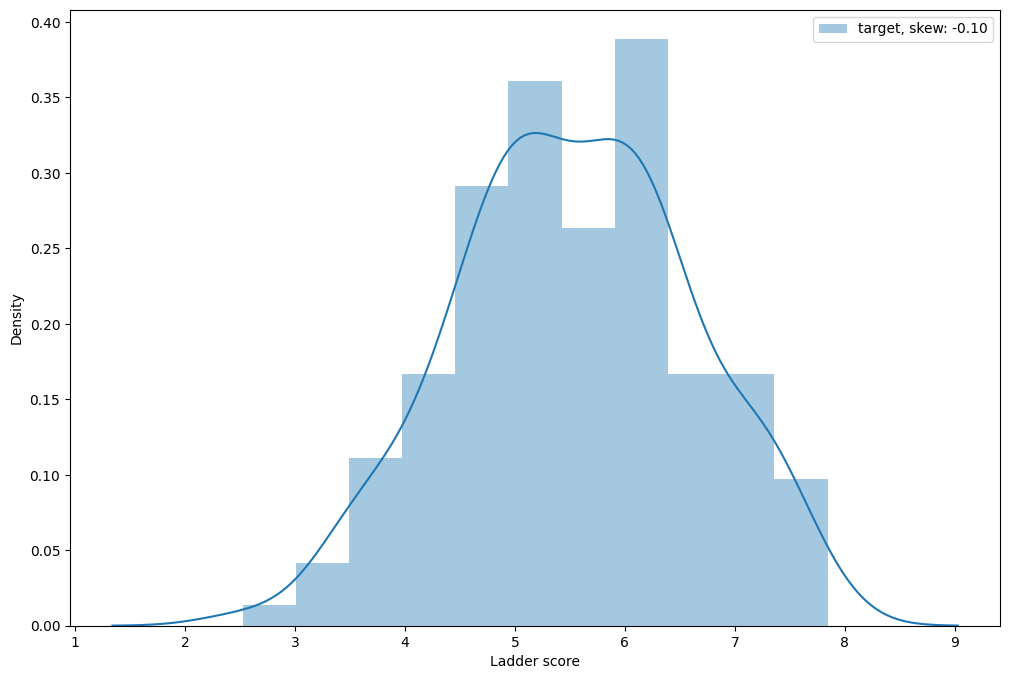

In [132]:
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [133]:
dataset_label.value_counts()

Ladder score
5.477    2
5.929    2
7.842    1
7.554    1
7.464    1
        ..
3.512    1
3.467    1
3.415    1
3.145    1
2.523    1
Name: count, Length: 147, dtype: int64

# BOW

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

In [135]:
vectorizer = CountVectorizer()

In [136]:
X = vectorizer.fit_transform(dataset_analist)

In [137]:
print(vectorizer.get_feature_names_out())

['by' 'capita' 'choices' 'corruption' 'dystopia' 'expectancy' 'explained'
 'freedom' 'gdp' 'generosity' 'healthy' 'life' 'log' 'make' 'of' 'per'
 'perceptions' 'residual' 'social' 'support' 'to']


In [138]:
print(X.toarray())

[[1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


In [139]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [140]:
X2 = vectorizer2.fit_transform(dataset_analist)

In [141]:
print(vectorizer2.get_feature_names_out())

['by freedom' 'by generosity' 'by healthy' 'by log' 'by perceptions'
 'by social' 'dystopia residual' 'explained by' 'freedom to' 'gdp per'
 'healthy life' 'life choices' 'life expectancy' 'log gdp' 'make life'
 'of corruption' 'per capita' 'perceptions of' 'social support' 'to make']


In [142]:
print(X2.toarray())


[[0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
